# Map and Car Geometry 

This is just a toy notebook for verifying coordinate transformation between the map coordinates and the car coordinates.  The data being used for `ptsx` and `ptsy` is the waypoint data returned by telemetry from the simulator when the car first starts on the track.  The `x` and `y` values, as well as the `psi` and `psi_unity` values are likewise from this first telemetry sample.  The first plot simply plots the waypoints and the location of the car.  The green dot is a dot projected in the direction `psi` so that it is clear what direction the car is facing (as well as eliminating `psi_unity` as an appropriate angle to use).

[]

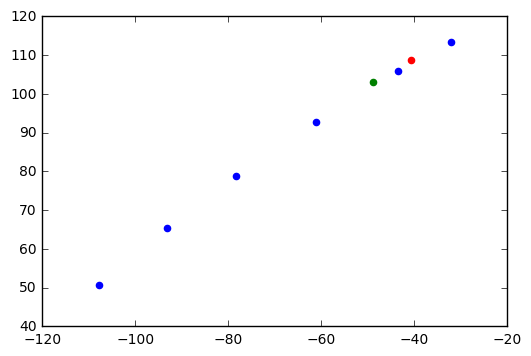

In [18]:
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Car location
x = -40.62
y = 108.73

# Car direction
psi_unity = 4.12033
psi = 3.733651

# Waypoint locations
ptsx = [-32.16173, -43.49173, -61.09, -78.29172, -93.05002, -107.7717]
ptsy = [113.361, 105.941, 92.88499, 78.73102, 65.34102, 50.57938]

# Projection in the direction psi to see the car heading
x2 = x + 10.0 * math.cos(psi)
y2 = y + 10.0 * math.sin(psi)

# Basic plot of map coordinates 
plt.scatter(ptsx, ptsy, color='blue')
plt.scatter(x, y, color='red')
plt.scatter(x2, y2, color='green')
plt.plot()


Here is a transformation function that takes an origin point, the point to transform and the direction to rotate.  The waypoints are transformed using this function and plotted in the same way as before.  The heading is not displayed since we are rotating it to be pointing directly in the positive `x` direction.

[]

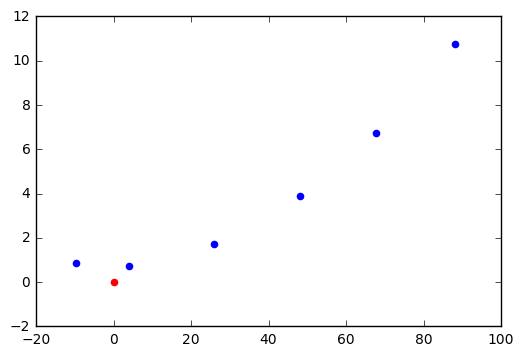

In [19]:
# Coordinate transformation function
def transform(x0, y0, x, y, angle):
    x1 = x - x0
    y1 = y - y0
    x2 = x1 * math.cos(angle) + y1 * math.sin(angle)
    y2 = x1 * -math.sin(angle) + y1 * math.cos(angle)
    return x2, y2

# Generate transformed coordinates
new_x = []
new_y = []
for i, _ in enumerate(ptsx):
    x2, y2 = transform(x, y, ptsx[i], ptsy[i], psi)
    new_x.append(x2)
    new_y.append(y2)
    
# Plot it
plt.scatter(new_x, new_y, color='blue')
plt.scatter(0, 0, color='red')
plt.plot()

This looks like it meets expectation. The road curves gently to the left on this section of the track, and from our perspective facing directly to the right on the `x` axis, the waypoints gently increase in the `y` value, indicative of a a right-hand coordinate system with `x` being straigh ahead (e.g. positive `y` is bearing left).  